# Классификация изображений с помощью предварительно обученной нейронной сети VGG16

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/pretrained_networks/tensorflow/vgg16_pretrained.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Загружаем предварительно обученную модель

Создаем модель с архитектурой VGG16 и загружаем веса, обученные на наборе данных ImageNet

In [ ]:

model = VGG16(weights='imagenet')

Информация о модели

In [15]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## Готовим изображение для распознавания

Путь к изображению

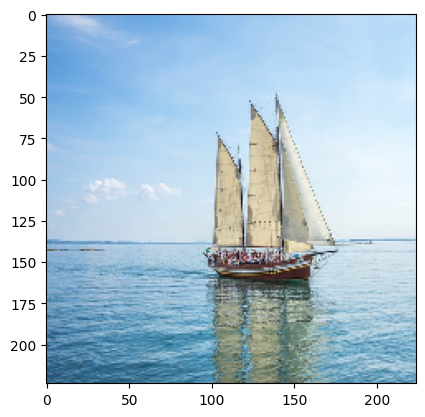

In [28]:
img_path = '../ship.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

Преобразовываем изображение в массив numpy и выполняем предварительную обработку

In [29]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

## Распознаем объект на изображении

Запускаем распознавание в предварительно обученной модели

In [30]:
preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Результаты распознавания

In [31]:
len(preds[0])

1000

In [32]:
preds

array([[8.81538085e-07, 6.29297119e-07, 6.81924985e-06, 4.32516390e-06,
        8.48454056e-06, 3.89333263e-06, 1.67032442e-06, 1.25878444e-06,
        9.01603528e-07, 2.47064833e-07, 7.01149190e-07, 7.02147531e-07,
        1.59983642e-06, 8.73744170e-07, 1.70656108e-06, 1.01697117e-06,
        1.47885623e-06, 3.85462909e-06, 1.75020773e-06, 4.47885043e-07,
        2.13525527e-06, 8.65972561e-06, 3.69906047e-06, 4.25248970e-07,
        3.03233014e-06, 2.07135813e-07, 4.93865571e-07, 4.30418055e-07,
        7.28606722e-08, 3.12780003e-07, 2.81689768e-06, 4.96713824e-07,
        1.45468664e-06, 7.30134207e-06, 3.74201795e-06, 2.47285811e-06,
        2.66360166e-06, 3.08440718e-07, 1.46496703e-07, 4.37756262e-06,
        1.16716467e-06, 4.99458963e-07, 9.67248070e-07, 5.71513874e-06,
        1.38955897e-06, 8.13630763e-08, 2.12458076e-06, 1.39507608e-06,
        1.79652687e-07, 1.48538129e-05, 5.63474941e-06, 1.23927475e-06,
        1.78649444e-07, 3.36907902e-07, 2.87056400e-06, 3.408688

Печатаем три наиболее вероятных класса объекта

In [33]:
decode_predictions(preds, top=3)[0]

[('n04147183', 'schooner', np.float32(0.5702315)),
 ('n04612504', 'yawl', np.float32(0.25127456)),
 ('n02981792', 'catamaran', np.float32(0.08795091))]